In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import pearsonr
import functions

In [2]:

LifeExpectancy_1 = functions.getDataFrame('https://ghoapi.azureedge.net/api/WHOSIS_000001')
Under5_Mortality_1 = functions.getDataFrame('https://ghoapi.azureedge.net/api/MDG_0000000007')
MaternalMortalityRatio_1 = functions.getDataFrame('https://ghoapi.azureedge.net/api/MDG_0000000026')
global_data = functions.getDataFrame(
    'https://frontdoor-l4uikgap6gz3m.azurefd.net/DEX_CMS/GHE_FULL?&$orderby=VAL_DEATHS_RATE100K_NUMERIC%20desc&$select=DIM_COUNTRY_CODE,DIM_GHECAUSE_CODE,DIM_GHECAUSE_TITLE,DIM_YEAR_CODE,DIM_SEX_CODE,DIM_AGEGROUP_CODE,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_COUNT_NUMERIC,ATTR_POPULATION_NUMERIC,VAL_DALY_RATE100K_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC&$filter=FLAG_RANKABLE%20eq%201%20and%20DIM_SEX_CODE%20eq%20%27BTSX%27%20and%20DIM_AGEGROUP_CODE%20eq%20%27ALLAges%27')

In [3]:
#data intialization
incomegroup = pd.read_excel("datasources/income group.xlsx", sheet_name='Sheet1')
region = pd.read_csv("datasources/country_region.csv")[['Country', 'Region']]


In [4]:
incomegroup = pd.melt(incomegroup, id_vars=['CountryCode', 'CountryName'],
                      value_vars=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
                                  2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], var_name='Year',
                      value_name='incomeGroup')
# left join with region table.

# merge datasets based on two columns:
countryInfo = incomegroup.merge(region, left_on='CountryName', right_on='Country')
countryInfo = countryInfo[['Country', 'CountryCode', 'Region', 'Year', 'incomeGroup']]

In [5]:
###########################
# Hypothesis 1 block:
###########################

In [6]:
global_data_1 = global_data.rename(columns={"DIM_COUNTRY_CODE": "countryCode",
                                            "DIM_YEAR_CODE": "year",
                                            "ATTR_POPULATION_NUMERIC": "population",
                                            "DIM_GHECAUSE_CODE": "diseaseCode",
                                            "DIM_GHECAUSE_TITLE": "diseaseName",
                                            "VAL_DEATHS_COUNT_NUMERIC": "deathNum"
                                            })

global_data_1['diseaseCode'] = global_data_1['diseaseCode'].astype('int')
global_data_1['year'] = global_data_1['year'].astype('int')

global_data_1 = global_data_1.merge(countryInfo, how='left', left_on=['countryCode', 'year'],
                                    right_on=['CountryCode', 'Year'])  # left join

global_data_1['mortality_type'] = None
global_data_1.loc[global_data_1['diseaseCode'] < 600, 'mortality_type'] = 'communicable'
global_data_1.loc[
    (global_data_1['diseaseCode'] > 600) & (global_data_1['diseaseCode'] < 1510), 'mortality_type'] = 'noncommunicable'
global_data_1.loc[global_data_1['diseaseCode'] > 1510, 'mortality_type'] = 'Injuries'



In [7]:
global_data_1 = global_data_1[
    ['countryCode', 'Country', 'incomeGroup', 'year', 'population', 'mortality_type', 'diseaseCode', 'diseaseName',
     'deathNum']]

In [8]:
functions.Integrity_Check(global_data_1)

Is there any null value in the dataset
False
Every year has all country data?
year
2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2013    183
2014    183
2015    183
2016    183
2017    183
2018    183
2019    183
Name: countryCode, dtype: int64
which country provide more data?
countryCode
RUS    927
SOM    901
CAF    884
UKR    879
LTU    879
      ... 
SAU    370
BHR    351
ARE    319
QAT    285
KWT    261
Name: year, Length: 183, dtype: int64
How many cause of death in the dataset? Any herirarchy?
list[array(['Natural disasters', 'HIV/AIDS', 'Ischaemic heart disease',
       'Collective violence and legal intervention', 'Stroke', 'Malaria',
       'Diarrhoeal diseases', 'Lower respiratory infections', 'Measles',
       'Hypertensive heart disease',
       'Cardiomyopathy, myocarditis, endocarditis',
       'Protein-energy malnutrition', 'Neonatal conditions',
       'Alzheime

Death rate all over the world is getting lower

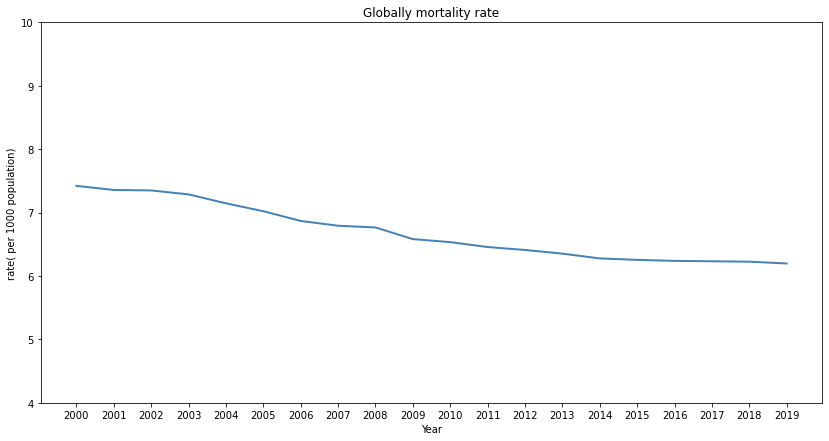

In [9]:
world_mortality_trend=functions.world_mortality_trend(global_data_1)

the trend of death rate in four income group.
the decreasing rate of low income countries is the reason to explain the globally decreasing

the death rate has declined in the low income group, so this might be one reason to led the global reduction.
other findings:
1.In low income countries, two peaks appeared around 2007 and 2014.
2.In upper middle countries, a peak appeared around 2004.

<AxesSubplot:title={'center':'death rate trend from 2000-2019 by income_group'}, xlabel='year', ylabel='death_per1000 '>

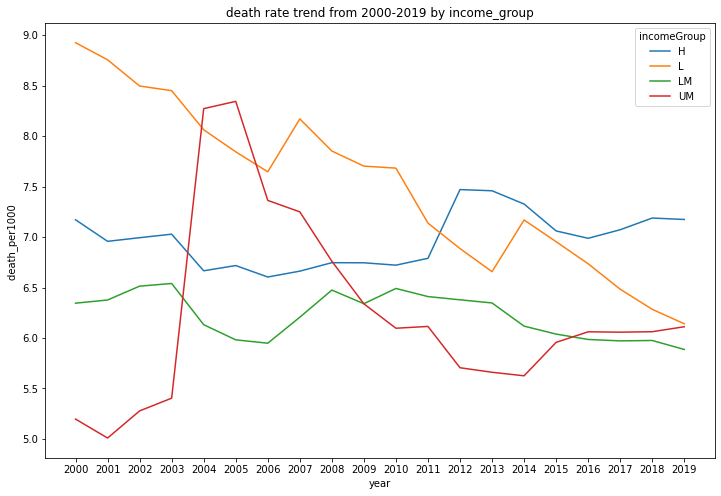

In [10]:
d = functions.ratetrend_incomegroup(global_data_1)
plotdata = d.pivot(index='year', columns='incomeGroup', values='death_per1000')
plotdata.plot(kind='line', xlabel='year', ylabel='death_per1000 ',
              title='death rate trend from 2000-2019 by income_group',
              figsize=(12, 8), legend=True, xticks=(range(2000, 2020, 1)))

The trend of three mortality type all over the world
the decreasing rate of communicable Mortality is the reason to explain the globally decreasing

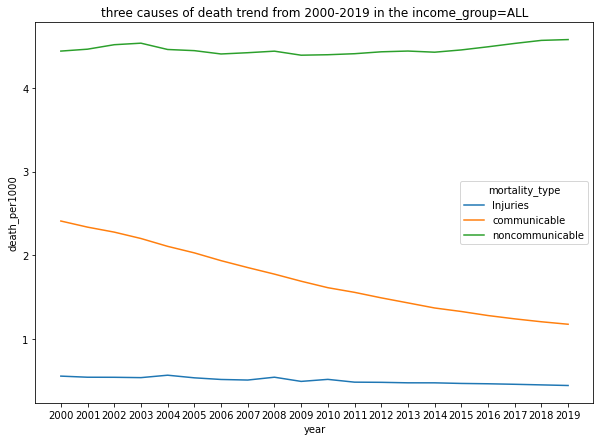

In [11]:
deathtypetrend=functions.deathtypetrend(global_data_1)

Different pattern of cause-of-death type in different income group

2004


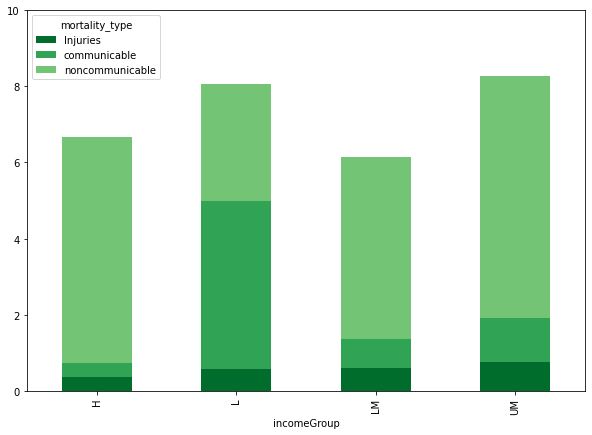

In [12]:
print('2004')
Topdeathtype_incomegroup_year_2004=functions.Topdeathtype_incomegroup_year(global_data_1, 2004)

How the mortality type changed?

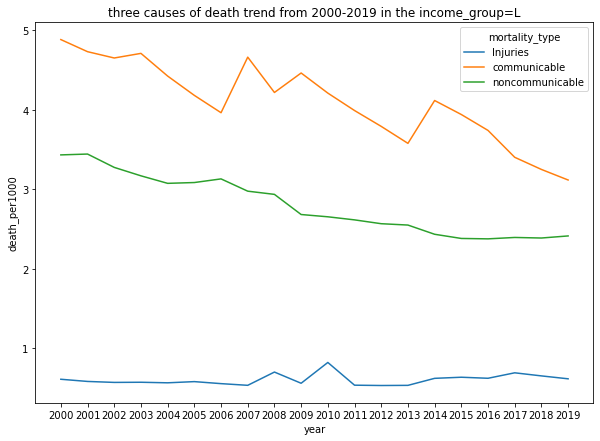

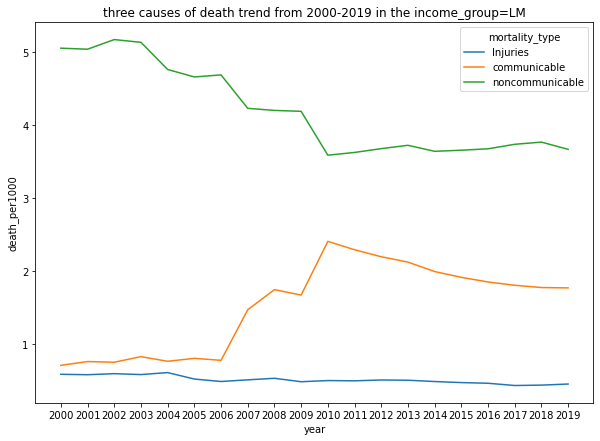

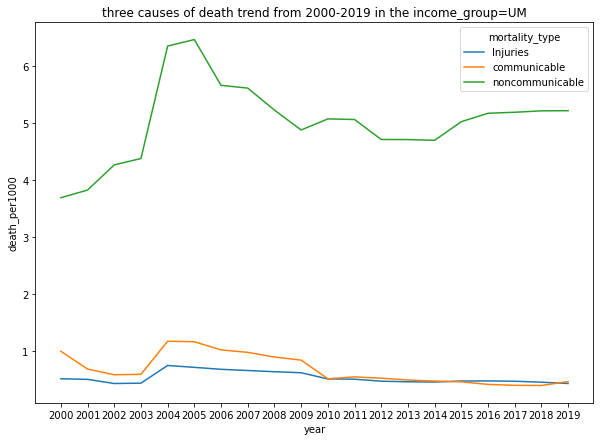

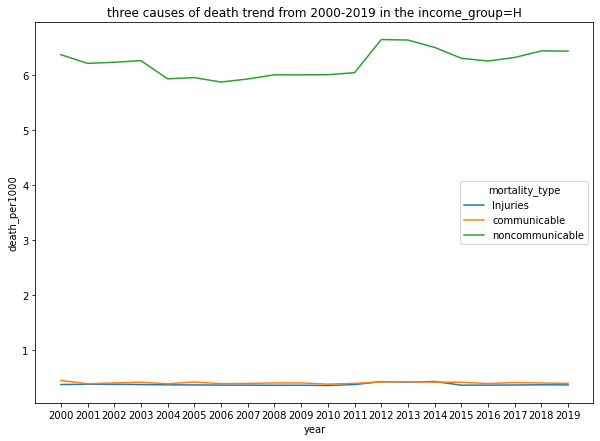

In [13]:

deathtypetrend_L=functions.deathtypetrend(global_data_1, income_group='L')
deathtypetrend_LM=functions.deathtypetrend(global_data_1, income_group='LM')
deathtypetrend_UM=functions.deathtypetrend(global_data_1, income_group='UM')
deathtypetrend_H=functions.deathtypetrend(global_data_1, income_group='H')

Global leading cause-of-death disease in 2004


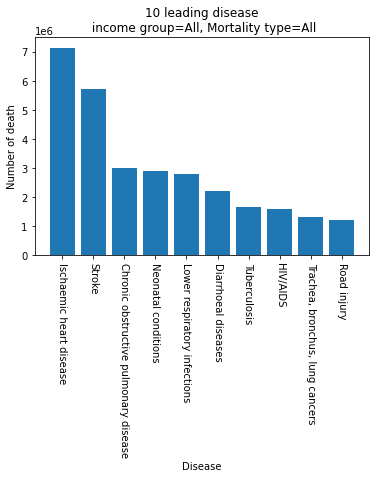

<Figure size 1440x1440 with 0 Axes>

In [14]:
Topcause_year_2004=functions.Topcause_year(global_data_1, 2004)

Compare leading disease between High and Low income group in 2004
There are major differences in the ranking of causes between high- and low-income countries

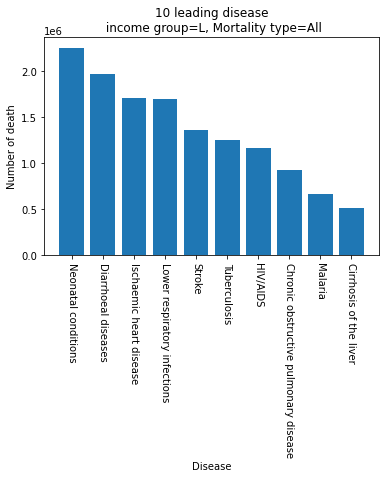

<Figure size 1440x1440 with 0 Axes>

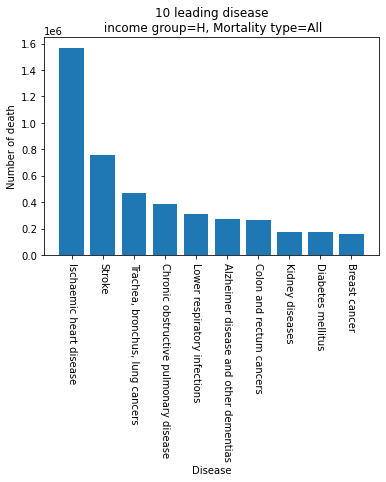

<Figure size 1440x1440 with 0 Axes>

In [15]:
Topcause_year_2004_L=functions.Topcause_year(global_data_1, 2004, income_group='L')
Topcause_year_2004_H=functions.Topcause_year(global_data_1, 2004, income_group='H')


The trend of Leading communicable mortality diseases in Low income countries

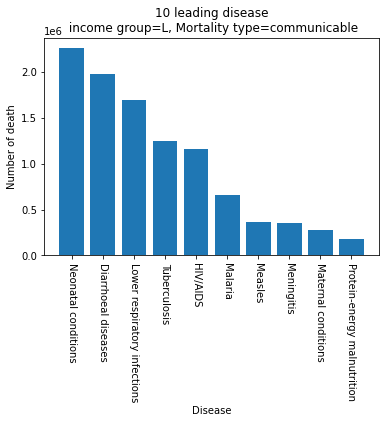

<Figure size 1440x1440 with 0 Axes>

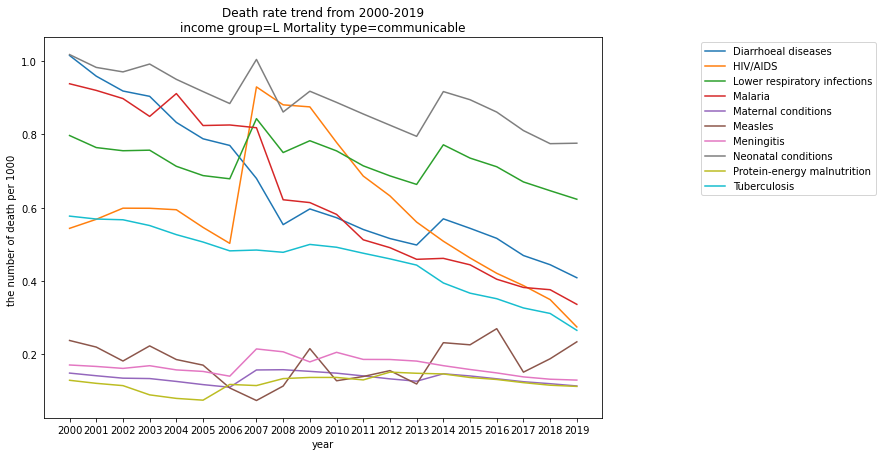

In [16]:
Topcause_trend=functions.Topcause_trend(global_data_1, 2004, income_group='L', category='communicable')

The trend of Leading non-communicable mortality diseases(2005) in Upper-middle income countries


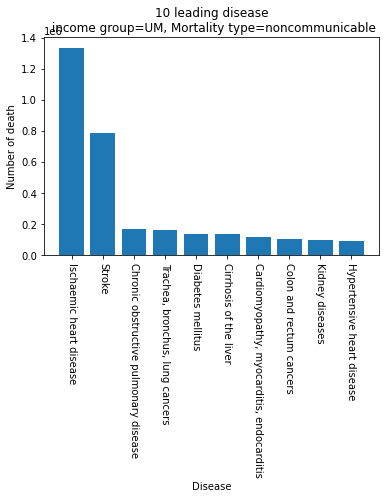

<Figure size 1440x1440 with 0 Axes>

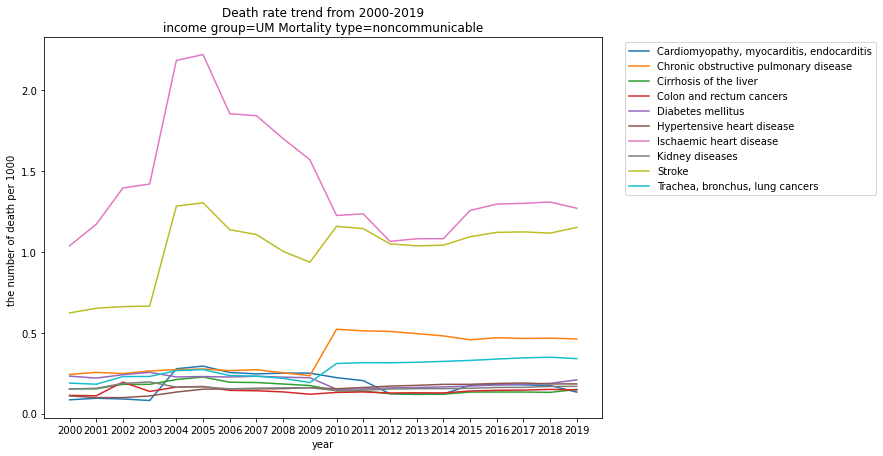

In [17]:
Topcause_trend_2=functions.Topcause_trend(global_data_1, 2005, income_group='UM', category='noncommunicable')

In [18]:
###########################
# Hypothesis 2 block:
###########################

In [19]:
# merge datasets based on two columns:
healthExp = pd.read_excel("datasources/healthExp_data.xlsx", sheet_name='cleaned')
healthExp = healthExp[['country', 'year', 'che_gdp']]


countryInfoAll = countryInfo.merge(healthExp, left_on=['Country', 'Year'], right_on=['country', 'year'])
countryInfoAll = countryInfoAll[['Country', 'Region', 'CountryCode', 'Year', 'incomeGroup', 'che_gdp']]
countryInfoAll = countryInfoAll.astype({"Year": str})

# reformatting data set for further analysis
Under5_Mortality = functions.formatWithSex('Under5_Mortality', Under5_Mortality_1)
LifeExpectancy = functions.formatWithSex('LifeExpectancy', LifeExpectancy_1)
MaternalMortalityRatio = functions.formatWithoutSex(MaternalMortalityRatio_1)
InfoAll = countryInfoAll.merge(LifeExpectancy, left_on=['CountryCode', 'Year'], right_on=['countrycode', 'year'],
                               how='left')
InfoAll = InfoAll.astype({"Year": int})

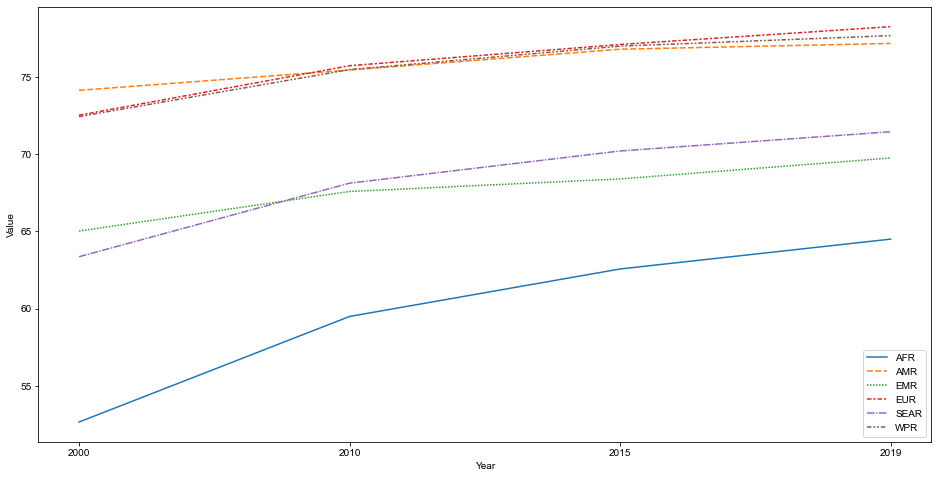

In [20]:
# Hypothesis 2
# finding: the life expectancy is increasing over years
functions.lineplot_time(LifeExpectancy_1)

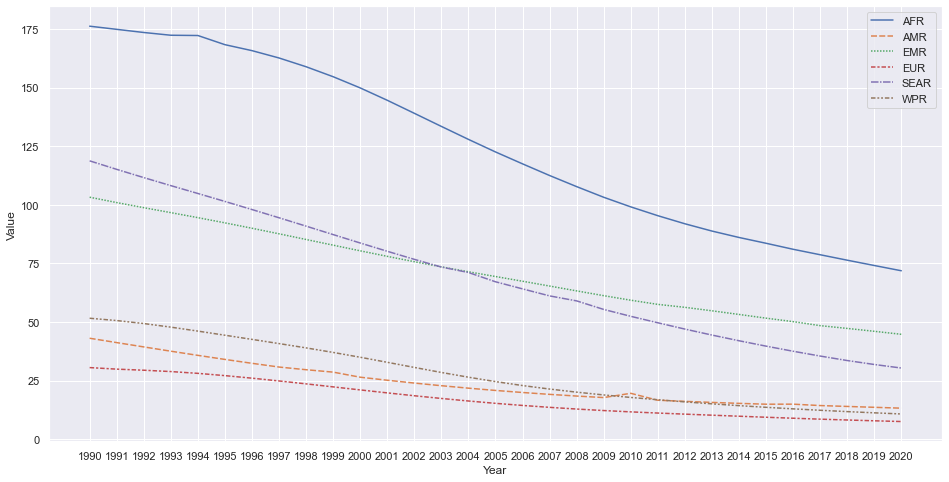

In [21]:
# finding: the Under5_Mortality is decreasing over years
functions.lineplot_time(Under5_Mortality_1)

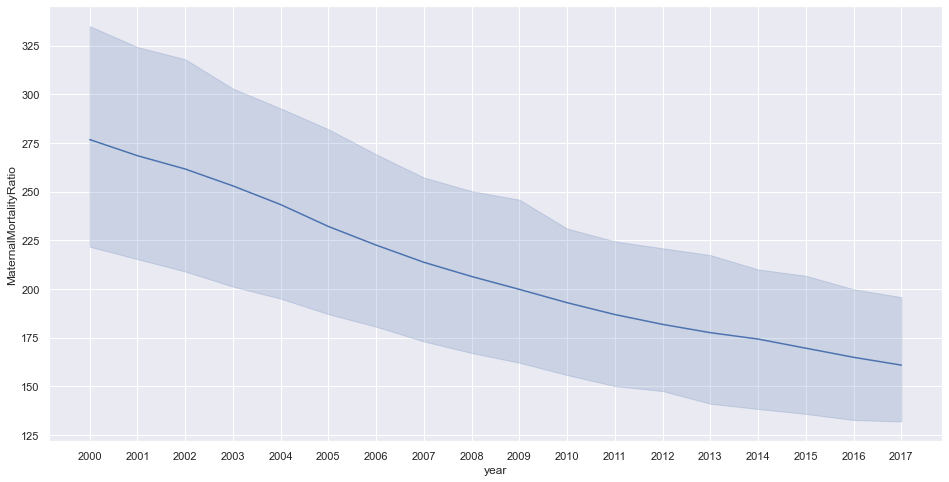

In [22]:
# finding: the average of Maternal Mortality Ratio over the world was decreasing over time
plt.figure(figsize=(16, 8))
MaternalMortalityRatio = MaternalMortalityRatio.sort_values('year')
sns.lineplot(data=MaternalMortalityRatio, x="year", sort=False, y="MaternalMortalityRatio")
sns.set(rc={"figure.figsize": (3, 4)})
plt.show()

In [23]:
# all data includes health expendure, three factors, year, incomegroup, and region for each country
# anova table shows that all three factors were related to health expenditure, of which the region has the most significant correlation
# Ordinary Least Squares (OLS) model
model = ols('che_gdp ~ Year+incomeGroup+Region',
            data=InfoAll.astype({"Year": str})).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Year,303.340452,19.0,2.503468,3.192007e-04
incomeGroup,1527.263417,4.0,59.871376,8.014869e-49
Region,1500.962635,6.0,39.226893,2.975714e-46
Residual,20375.373572,3195.0,NaN,NaN


In [24]:
# correlation between independent Year and dependent var = che_gdp in Year 2019
yearexp = InfoAll[['che_gdp', 'Year']].dropna()
pearsonr(yearexp['che_gdp'], yearexp['Year'].astype({"Year": int}))

(0.11329528204354981, 1.1022013594640358e-10)

##### Effect of Health Expenditure on Selected Health Outcomes

In [25]:
# health expenditure per region per year
InfoAll2015_ = InfoAll.loc[(InfoAll["Year"] == 2015) | (InfoAll["Year"] == 2016) | (InfoAll["Year"] == 2017) | (
        InfoAll["Year"] == 2018) | (InfoAll["Year"] == 2019)]
d = InfoAll2015_[['Region', 'Year', 'che_gdp']]
d = d.dropna()
d = d.pivot_table(index='Region', columns='Year', values='che_gdp', aggfunc='mean')
print(d)

Year                             2015       2016       2017       2018  \
Region                                                                   
East Asia & Pacific          6.809137   6.669258   6.673334   6.739615   
Europe & Central Asia        7.628844   7.650285   7.588706   7.589544   
Latin America & Caribbean    6.853407   6.848583   6.876387   6.998009   
Middle East & North Africa   5.456460   5.490857   5.576039   5.565831   
North America               10.733205  11.022961  10.835383  10.806375   
South Asia                   5.103873   5.479239   5.223773   5.265578   
Sub-Saharan Africa           5.960786   5.840205   5.684228   5.676715   

Year                             2019  
Region                                 
East Asia & Pacific          7.210822  
Europe & Central Asia        7.735785  
Latin America & Caribbean    7.110047  
Middle East & North Africa   5.542898  
North America               10.844478  
South Asia                   5.286553  
Sub-Saharan A

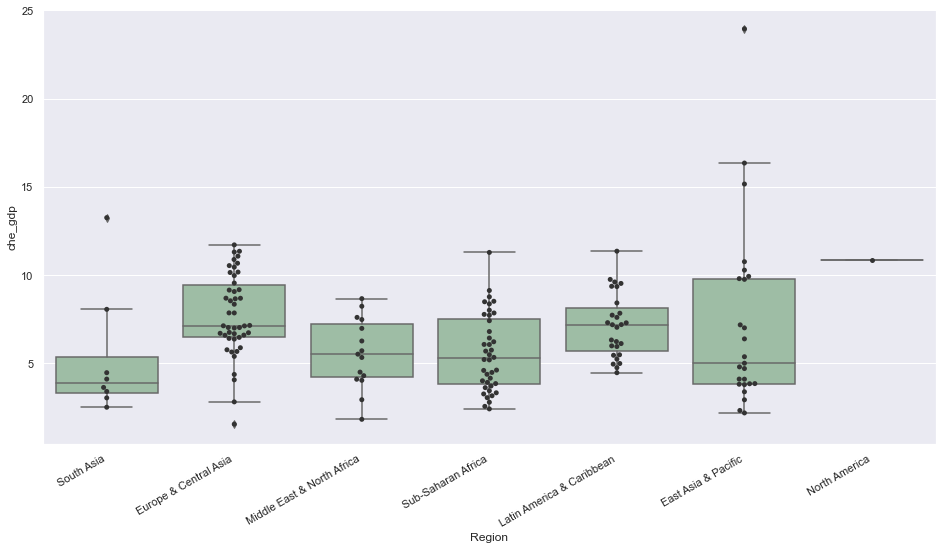

In [26]:
# generate a boxplot to see the health expenditure distribution by income groups. Using boxplot, we can easily
# detect the differences between income groups
# CAN is only country in North America
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x='Region', y='che_gdp', data=InfoAll[InfoAll['Year'] == 2019], color='#99c2a2')
ax = sns.swarmplot(x="Region", y="che_gdp", data=InfoAll[InfoAll['Year'] == 2019], color=".2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
sns.set(rc={"figure.figsize": (3, 4)})
plt.show()
# highest value: Tuvalu in East Asia

In [27]:
# life Expectancy recorded data every five year. 2010, 2015, 2000, 2019.
# drop nan before calculating correlation
InfoAll = InfoAll.astype({"Year": str})
InfoAll = InfoAll.merge(Under5_Mortality, left_on=['CountryCode', 'Year'], right_on=['countrycode', 'year'], how='left')
InfoAll = InfoAll.merge(MaternalMortalityRatio, left_on=['CountryCode', 'Year'], right_on=['countrycode', 'year'],
                        how='left')
InfoAll = InfoAll[
    ['Country', 'Region', 'CountryCode', 'Year', 'incomeGroup', 'che_gdp', 'LifeExpectancy_BTSX', 'LifeExpectancy_FMLE',
     'LifeExpectancy_MLE', 'Under5_Mortality_BTSX', 'Under5_Mortality_FMLE', 'Under5_Mortality_MLE',
     'MaternalMortalityRatio']]
lifeExp_clean = InfoAll[
    ['Country', 'Region', 'CountryCode', 'Year', 'incomeGroup', 'che_gdp', 'LifeExpectancy_BTSX']].dropna()
Under5_clean = InfoAll[
    ['Country', 'Region', 'CountryCode', 'Year', 'incomeGroup', 'che_gdp', 'Under5_Mortality_BTSX']].dropna()
MaternalMortality_clean = InfoAll[
    ['Country', 'Region', 'CountryCode', 'Year', 'incomeGroup', 'che_gdp', 'MaternalMortalityRatio']].dropna()

In [28]:
# aligned with previous finding that in Sub-Saharan Africa Under5_Mortality in both sex decreased with health expenditure increased
print(functions.effectOfexp2015before(Under5_clean, 'Under5_Mortality_BTSX', 'Sub-Saharan Africa'))
print(functions.effectOfexp2015before(Under5_clean, 'Under5_Mortality_BTSX', 'Latin America & Caribbean'))  #
print(functions.effectOfexp2015before(Under5_clean, 'Under5_Mortality_BTSX', 'Europe & Central Asia'))  #
print(functions.effectOfexp2015before(Under5_clean, 'Under5_Mortality_BTSX', 'Middle East & North Africa'))  #
print(functions.effectOfexp2015before(Under5_clean, 'Under5_Mortality_BTSX', 'North America'))  #
print(functions.effectOfexp2015before(Under5_clean, 'Under5_Mortality_BTSX', 'South Asia'))
print(functions.effectOfexp2015before(Under5_clean, 'Under5_Mortality_BTSX', 'East Asia & Pacific'))

(-0.05273386907325078, 0.20671833076973575)
(-0.4179164339961643, 1.4967499397694152e-18)
(-0.4377385676479083, 7.478549328545166e-34)
(-0.18264024249414057, 0.005070690395405787)
(-0.8934616316635844, 7.234990411166803e-06)
(-0.04388444357190594, 0.6370268182400295)
(0.07482459010325876, 0.1497748139582902)


In [29]:
# except for Sub-Saharan Africa and South Asia, the life expectancy increased with every increase in health expenditure
# after 2015, in Middle East & North Africa, with every one percent increase in health expenditure over total GDP, results in 0.42 percent decrease in the Under5_Mortality rate despite of sex
print(functions.effectOfexp2015after(Under5_clean, 'Under5_Mortality_BTSX', 'Sub-Saharan Africa'))
print(functions.effectOfexp2015after(Under5_clean, 'Under5_Mortality_BTSX', 'Latin America & Caribbean'))
print(functions.effectOfexp2015after(Under5_clean, 'Under5_Mortality_BTSX', 'Europe & Central Asia'))
print(functions.effectOfexp2015after(Under5_clean, 'Under5_Mortality_BTSX', 'Middle East & North Africa'))
print(functions.effectOfexp2015after(Under5_clean, 'Under5_Mortality_BTSX', 'North America'))
print(functions.effectOfexp2015after(Under5_clean, 'Under5_Mortality_BTSX', 'South Asia'))
print(functions.effectOfexp2015after(Under5_clean, 'Under5_Mortality_BTSX', 'East Asia & Pacific'))

(0.06156939736221051, 0.38885774979525406)
(-0.4862107616124712, 2.2546645622071464e-09)
(-0.2670176197170783, 3.5020413090515225e-05)
(-0.4219379370769157, 0.0001629955677646404)
(-0.017347199679069863, 0.9779139671915713)
(0.13045875955951536, 0.4223403112969549)
(0.06635443454214812, 0.46220372858363734)


In [30]:
# only one country in north america, the relationship is weird
# conclusion from regional paper: year: before 2015 in Sub-Saharan Africa, 1 percent increase in health expenditure per capita improve life expectancy by 0.06 percent.
# our finding: after 2015, except for Sub-Saharan Africa and South Asia, the life expectancy increased with every increase in health expenditure
# in Latin America & Caribbean, with every one percent increase in health expenditure over total GDP, results in 0.42 years increase in life expectancy
print(functions.effectOfexp2015after(lifeExp_clean, 'LifeExpectancy_BTSX', 'Sub-Saharan Africa'))
print(functions.effectOfexp2015after(lifeExp_clean, 'LifeExpectancy_BTSX', 'Latin America & Caribbean'))
print(functions.effectOfexp2015after(lifeExp_clean, 'LifeExpectancy_BTSX', 'Europe & Central Asia'))
print(functions.effectOfexp2015after(lifeExp_clean, 'LifeExpectancy_BTSX', 'Middle East & North Africa'))
print(functions.effectOfexp2015after(lifeExp_clean, 'LifeExpectancy_BTSX', 'North America'))
print(functions.effectOfexp2015after(lifeExp_clean, 'LifeExpectancy_BTSX', 'South Asia'))
print(functions.effectOfexp2015after(lifeExp_clean, 'LifeExpectancy_BTSX', 'East Asia & Pacific'))

(-0.33508812357260476, 0.002539102449363511)
(0.4250678416044668, 0.0016829661955891796)
(0.5973238406976666, 1.0138810739613868e-09)
(0.63455158632821, 0.00016585742208048248)
(1.0, 1.0)
(-0.24369684196681535, 0.3630676080782074)
(0.3235638234832593, 0.036595604558377945)


In [31]:
# maternal mortality rate for each region and its correlation with the increase/decrease in health expenditure
# except for Sub-Saharan Africa and South Asia, the mortality rate decreased with every increase in health expenditure
# in Latin America & Caribbean, with every one percent increase in health expenditure over total GDP, results in 0.35 percent decrease in the mortality rate
print(functions.effectOfexp2015after(MaternalMortality_clean, 'MaternalMortalityRatio', 'Sub-Saharan Africa'))
print(functions.effectOfexp2015after(MaternalMortality_clean, 'MaternalMortalityRatio', 'Latin America & Caribbean'))
print(functions.effectOfexp2015after(MaternalMortality_clean, 'MaternalMortalityRatio', 'Europe & Central Asia'))
print(functions.effectOfexp2015after(MaternalMortality_clean, 'MaternalMortalityRatio', 'Middle East & North Africa'))
print(functions.effectOfexp2015after(MaternalMortality_clean, 'MaternalMortalityRatio', 'North America'))
print(functions.effectOfexp2015after(MaternalMortality_clean, 'MaternalMortalityRatio', 'South Asia'))
print(functions.effectOfexp2015after(MaternalMortality_clean, 'MaternalMortalityRatio', 'East Asia & Pacific'))

(0.23704581869989647, 0.009751693990760864)
(-0.3583465131780046, 0.0012755089397438722)
(-0.4534716539415885, 4.752601925893249e-08)
(-0.32635704173308233, 0.02867260395320298)
(-0.7698790398905194, 0.44063302240183144)
(0.6019312160434016, 0.001858484872325718)
(-0.22189943511888263, 0.08048733973069434)
